In [24]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

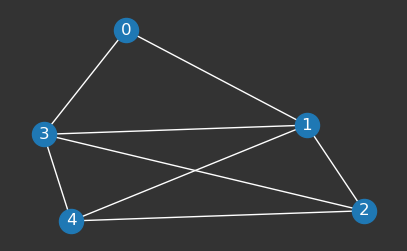

In [25]:
#Defining the graph
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from([(0,1), (0,3), (3,1), (3,4), (1,2), (2,4), (1,4), (3,2)])

# #plotting the A
pos = nx.spring_layout(G)
fig, ax = plt.subplots()
nx.draw(G, with_labels=True, edge_color='white', font_color='white')
fig.set_facecolor('#333333')
fig.set_size_inches((5,3))
plt.show()

In [26]:
print(nx.to_numpy_array(G,dtype=int))

[[0 1 0 1 0]
 [1 0 1 1 1]
 [0 1 0 1 1]
 [1 1 1 0 1]
 [0 1 1 1 0]]


In [27]:
def isSafe(v, A, path, pos, visited):
    if A[path[pos - 1]][v] == 0:
        return False
    if visited[v]:
        return False
    return True

def hamCycle(G):
    A = nx.to_numpy_array(G, dtype=int) 
    path = [0]
    visited = [False] * len(A)
    visited[0] = True
    if not FindHamCycle(A, 1, path, visited):
        print("No Hamiltonian Cycle possible")

def FindHamCycle(A, pos, path, visited):
    if pos == len(A):
        if A[path[-1]][path[0]] != 0:
            path.append(0)
            print(" ".join(map(str, path)))
            path.pop()
            return True
        else:
            return False

    found = False
    for v in range(len(A)):
        if isSafe(v, A, path, pos, visited):
            path.append(v)
            visited[v] = True
            if FindHamCycle(A, pos + 1, path, visited):
                found = True
            visited[v] = False
            path.pop()

    return found



# graph = [
#     [0, 1, 1, 0, 0, 1],
#     [1, 0, 1, 0, 1, 1],
#     [1, 1, 0, 1, 0, 0],
#     [0, 0, 1, 0, 1, 0],
#     [0, 1, 0, 1, 0, 1],
#     [1, 1, 0, 0, 1, 0],
# ]
hamCycle(G)



0 1 2 4 3 0
0 1 4 2 3 0
0 3 2 4 1 0
0 3 4 2 1 0
